<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Sesiones/Sesion_11_SVM_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Máquinas de Soporte Vectorial SVM

Sección 2.4.3 en https://arxiv.org/pdf/2204.04198

Este es un modelo con origenes que se remontan a los 60's y que se creó desde un punto de vista geométrico. Con este se puede llegar por un camino diferente a la función de coste y regularización a los que llegamos por el método Maximum Likelihood Estimator.

Empecemos con un problema de clasificación de unos datos cuyo i-esimos record $X^{(i)}$ tiene dos variables y que queremos predecir si pertenecen a una clase +1 y 0. El modelo de clasificación se condensa en tres parámetros $\theta_0,\theta_1,\theta_2$ que definen una linea (un hiperplano cuando pensemos en más dimensiones) a través de la ecuación $\theta^T X + \theta_0 = 0$ con $ \theta=(\theta_1,\theta_2)$. Los puntos de la linea son los puntos perpendiculares a $ \theta$. Los puntos del plano quedan clasificados por la región respecto por el signo que resulta del producto escalar $\theta^T X$. Si este producto es positivo están en la región que definimos como de clase +1 y si es negativo en la región definida como clase 0. Con solo argumentos de geometría se demuestra que encontrar los mejores parámetros para un conjunto de datos equivale a minimizar una función de coste parecida a las encontradas anteriormente.

La cantidad principal es la menor distancia que hay entre un punto cualquiera del plano (x1,x2) y el plano del modelo $\theta^T X + \theta_0 = 0$. Esta distancia está dada por $$ d(x, \theta) = \frac{\theta^T x + \theta_0}{| \theta |} $$
El problema de encontrar un buen hiperplano de clasificación consiste entonces en encontrar un conjunto de parámetros que la distancia al hiperplano sea tan grande como pósible o al menos mas grande que una región que escribiremos como $M | \theta |$ es decir resolver que para todo i se cumpla:
$$ y_i (\theta^T x + \theta_0) \ge  M | \theta | $$

Ahora, para simplificar, reescalamos $\theta$ con $ | \theta | = \frac{1}{M}$ tal que la el problema a solucionar se convierte en $$ y_i (\theta^T x + \theta_0) \ge  1 $$

Este reescalamiento hace que buscar que M sea tan grande como posible se convierte en el problema de buscar $| \theta |$ sea tan pequeño como posible. El problema de encontrar el mejor modelo de clasificiación es ahora entonces minimizar $| \theta |$ con la condición que $ y_i (\theta^T x + \theta_0) \ge  1 $ para todo i. Esto se logra por el método de Lagrange. Buscamos minimizar:

$$ L = \frac{1}{2} | \theta |^2 - \sum_i [ \alpha_i  y_i (\theta^T x + \theta_0) -  1 ] $$

Observermos que los terminos se parecen a los que llegamos por MLE. El primero disminuye la complejidad y el segundo término depende del error que se comete en la clasificación. En una libreria como sklearn la siguiente función de coste se llamaría con un parámetro $C$ que multiplicaría el segundo termino. Con esto podemos graduar que tanta importancia se le da al segundo término sobre el primero:

Hay mas detalles técnicos a tener en cuenta que si lo necesitan pueden consultar en estas notas por ejemplo:
https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf




In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Libraries for draw contours
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_contoursExact(ax, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


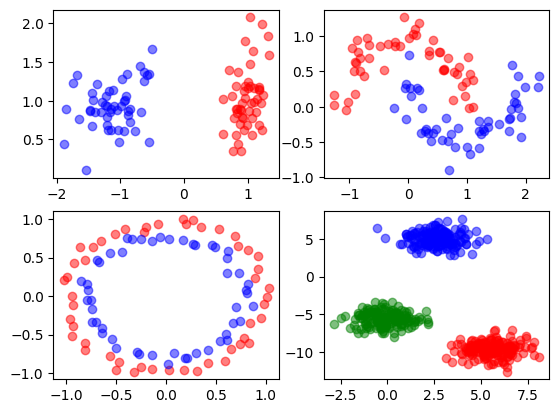

In [30]:
# Dataset Toys References
# https://scikit-learn.org/stable/datasets/toy_dataset.html
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# Dataset sinteticos
X0, y0 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1,
    n_clusters_per_class=1)

X1, y1 = make_moons(n_samples=100, noise=0.15, shuffle=True,  random_state=1)
X2, y2 = make_circles(n_samples=100, noise=0.05, shuffle=True,  random_state=1)
X3, y3 = make_blobs(n_samples=500, centers=3, n_features=2,shuffle=True,
                    random_state=10)

fig, axs = plt.subplots(2,2)

axs[0, 0].plot(X0[:,0][y0==0],X0[:,1][y0==0],"ro", alpha=0.5)
axs[0, 0].plot(X0[:,0][y0==1],X0[:,1][y0==1],"bo", alpha=0.5)

# Dataset a moons
axs[0, 1].plot(X1[:,0][y1==0],X1[:,1][y1==0],"ro", alpha=0.5)
axs[0, 1].plot(X1[:,0][y1==1],X1[:,1][y1==1],"bo", alpha=0.5)

# Dataset circles
axs[1, 0].plot(X2[:,0][y2==0],X2[:,1][y2==0],"ro", alpha=0.5)
axs[1, 0].plot(X2[:,0][y2==1],X2[:,1][y2==1],"bo", alpha=0.5)

# Dataset blobs
axs[1, 1].plot(X3[:,0][y3==0],X3[:,1][y3==0],"ro", alpha=0.5)
axs[1, 1].plot(X3[:,0][y3==1],X3[:,1][y3==1],"bo", alpha=0.5)
axs[1, 1].plot(X3[:,0][y3==2],X3[:,1][y3==2],"go", alpha=0.5)



In [31]:
# Based on :
# https://rramosp.github.io/ai4eng.v1.20211.udea/content/NOTES%2003.03%20-%20SVM%20AND%20FEATURE%20TRANSFORMATION.html

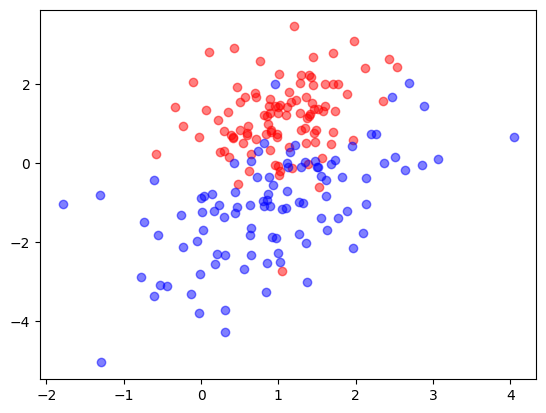

In [32]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, shuffle=True)
#X, y = make_circles(n_samples=200, noise=0.1, shuffle=True,  random_state=1)

plt.plot(X[:,0][y==0],X[:,1][y==0],"ro", alpha=0.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],"bo", alpha=0.5)

Training error:0.880


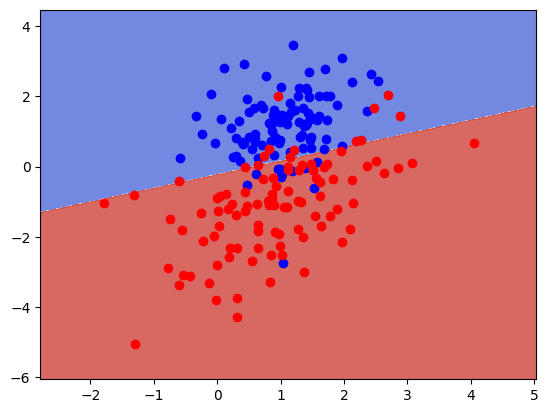

In [33]:
clf = SVC(kernel= 'linear', C=1.0) # C denota la fuerza del segundo termino. C muy pequeño hace que minimizar theta es mas importante
# se vuelven cero, o una constante y a partir de cierto valor ya el segundo termino empiza a tener mas peso
clf.fit(X, y)

#Countour plot
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap = plt.cm.coolwarm, alpha=0.8)
plt.plot(X[y==0][:,0],X[y==0][:,1],"bo", alpha=1)
plt.plot(X[y==1][:,0],X[y==1][:,1],"ro", alpha=1)
print(f"Training error:{clf.score(X, y):.3f}")


# Métodos de Kernel

Los métodos de Kernel transforman los datos en un espacio en el cual ellos tienen posibilidad de ser separados. Por ejemplo los circulos no hay manera que una frontera lineal los separe. Mas concretamente se trata de hacer una transformación $x \to \phi(x)$. Se determina una nueva función de coste que en vez de depender de $x_i$ va a depender de $\phi(x_i)$. El nombre de método de kernel viene del hecho del reemplazo
$$  \ket{x_i}, x_j \bra \to \ket \phi(x_i), \phi(x_j) = K(x_i, x_j) $$
donde se denota el kernel. Vamos a elegir diferentes kernels para los problemas anteriores.

Training error:0.870


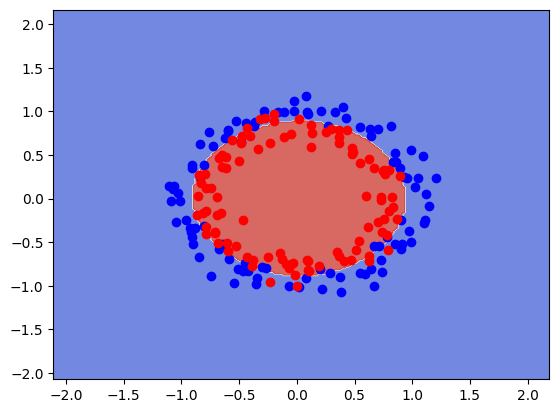

In [34]:
X, y = make_circles(n_samples=200, noise=0.1, shuffle=True,  random_state=1)
clf = SVC(kernel= 'rbf', gamma=1) # El parametro gamma es un parametro relacionado con la complejidad del kernel
clf.fit(X, y)

#Countour plot
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X[y==0][:,0],X[y==0][:,1],"bo", alpha=1)
plt.plot(X[y==1][:,0],X[y==1][:,1],"ro", alpha=1)
print(f"Training error:{clf.score(X, y):.3f}")


# Grid Search of parameter in SVM

Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.
https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e

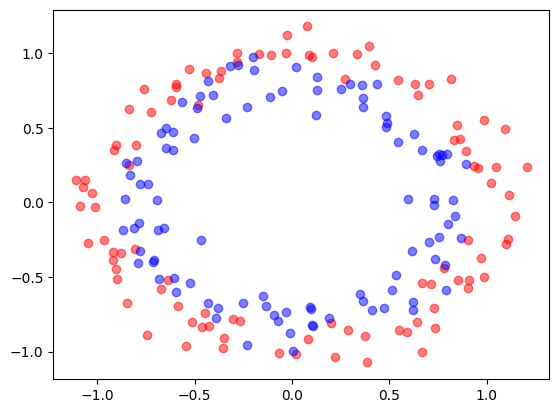

In [35]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV


X, y = make_circles(n_samples=200, noise=0.1, shuffle=True,  random_state=1)

plt.plot(X[:,0][y==0],X[:,1][y==0],"ro", alpha=0.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],"bo", alpha=0.5)

In [36]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

clf = GridSearchCV(estimator=SVC(),
             param_grid = parameters)

clf.fit(X, y)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [37]:
clf.cv_results_

{'mean_fit_time': array([0.00330315, 0.00332742, 0.00331283, 0.00332861]),
 'std_fit_time': array([2.34679010e-04, 6.66427312e-05, 1.43670885e-04, 8.07946217e-05]),
 'mean_score_time': array([0.00187716, 0.00202303, 0.00183969, 0.00196834]),
 'std_score_time': array([7.47472627e-05, 5.15225583e-05, 4.96472902e-05, 4.49104667e-05]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'}],
 'split0_test_score': array([0.275, 0.9  , 0.275, 0.9  ]),
 'split1_test_score': array([0.4  , 0.875, 0.4  , 0.9  ]),
 'split2_test_score': array([0.325, 0.725, 0.325, 0.725]),
 'split3_test_score': array([0.525, 0.8  , 0.525, 

In [38]:
clf.best_estimator_

SVC(C=10)

In [39]:
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [40]:
clf.best_score_

np.float64(0.8699999999999999)

Training error:0.880


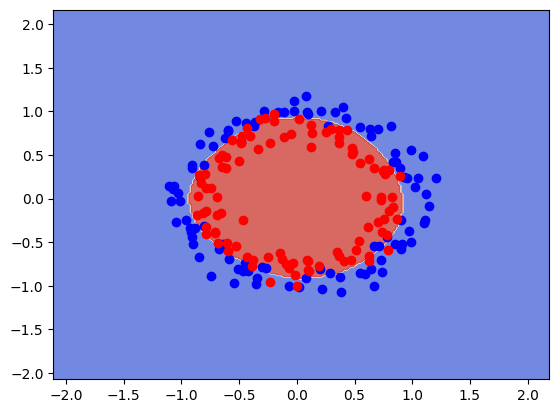

In [41]:
#Countour plot
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X[y==0][:,0],X[y==0][:,1],"bo", alpha=1)
plt.plot(X[y==1][:,0],X[y==1][:,1],"ro", alpha=1)
print(f"Training error:{clf.score(X, y):.3f}")


In [42]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  StandardScaler

from sklearn.metrics import roc_curve, roc_auc_score

In [43]:
#Data
X, y = make_circles(n_samples=1000, noise=0.1, shuffle=True,  random_state=1)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1080)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Best estimator: SVC(C=1)
Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.8387499999999999


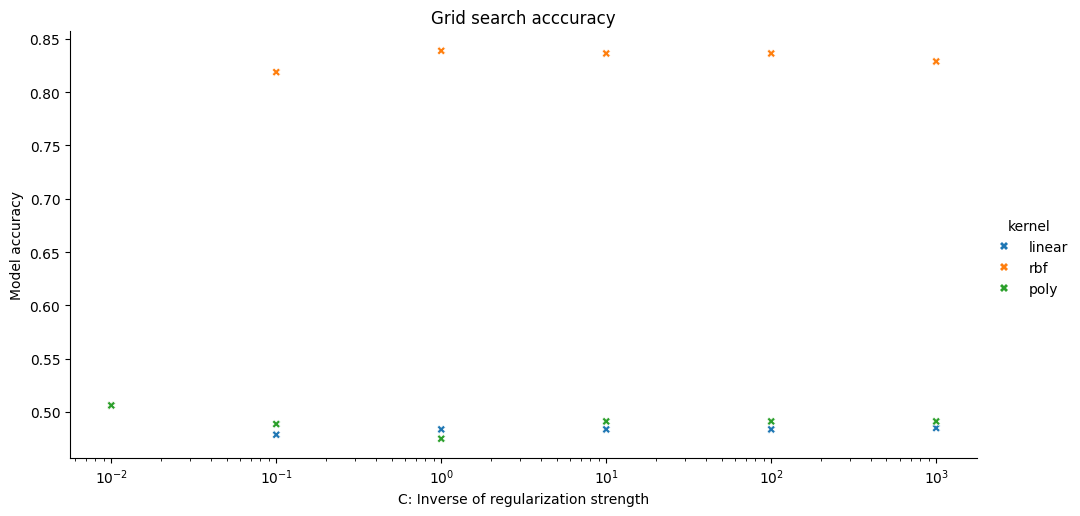

In [44]:
#Grid search
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.01, 0.1, 1, 10, 100, 1000]}


classifier = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring='accuracy')
classifier.fit(X_train_scaled, y_train)

#Grid search plots and print
mean_scores = classifier.cv_results_['mean_test_score']
std_scores = classifier.cv_results_['std_test_score']
kernel = classifier.cv_results_['param_kernel']
c = classifier.cv_results_['param_C'].data

scores = {'C': c, 'kernel':kernel, 'mean_test_score': mean_scores, 'std_test_score': std_scores}
scores_df = pd.DataFrame(data = scores)

ax = sns.relplot(data=scores_df,
                 x='C',
                 y='mean_test_score',
                 marker='X',
                 hue='kernel',
                 height=5,
                 aspect=2)

ax.set(title='Grid search acccuracy', xlabel='C: Inverse of regularization strength', ylabel='Model accuracy', xscale = 'log')

print('Best estimator: '+ str(classifier.best_estimator_))
print('Parameters: ' + str(classifier.best_params_))
print('Accuracy: ' + str(classifier.best_score_))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        95
           1       0.87      0.87      0.87       105

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



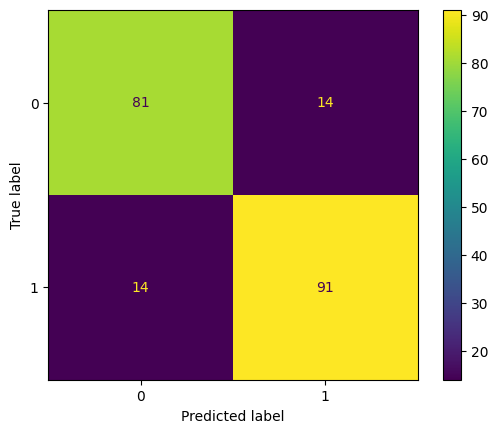

In [45]:
# Model
model = SVC(kernel='rbf', C=1)
model.fit(X_train_scaled,y_train)
# Confusion matrix
y_predict = model.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_predict))
cm = metrics.confusion_matrix(y_test, y_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

Tarea 11.1
1. Implementar un SVM para clasificar los siguientes datasets: make_moons, make_circles y make_bloobs, para ello se deberá crear un grid search.
2. Con los mejores párametros dibujar  las fronteras de clasificación
3. Con los mejores parámetros dibujar la matriz de confusion

In [46]:
#Nota: si quiere hacer grid search con diferentes tipos de kernel se puede pedir secuencial la búsqueda por ejemplo
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
#luego no podriamos graficar para comparar diferentes modelos pero podriamos pedir el mejor estimador de todos los evaluados

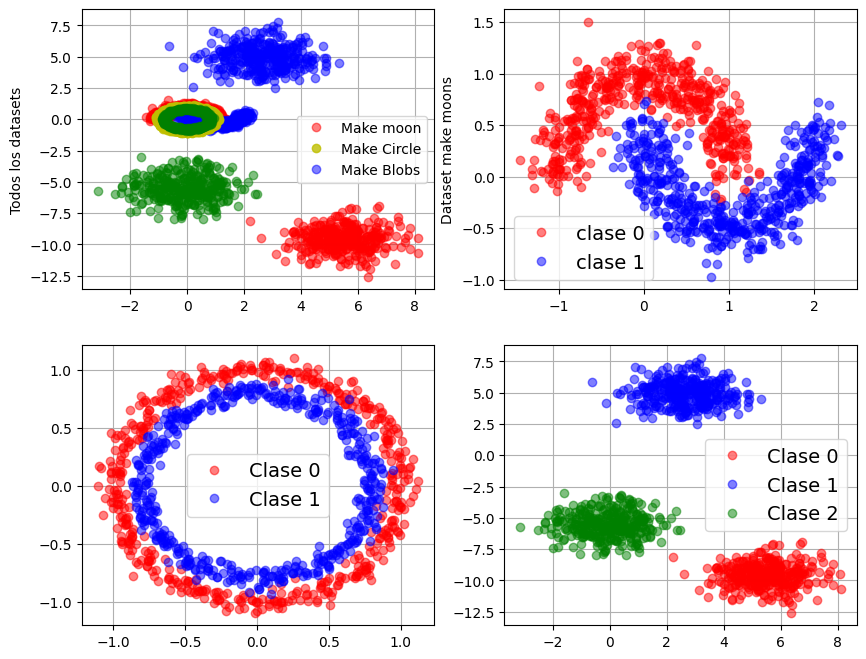

In [108]:
from sklearn.preprocessing import MinMaxScaler
# Lectura de los datasets.

# Make Moons
X1, y1 = make_moons(n_samples=1000, noise=0.15, shuffle=True,  random_state=1)

#=== Tratamiento de los datos===#

#Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state= 42)

# Reescalar los datos
escala = MinMaxScaler()
escala.fit(X_train1)
X1_scaled = escala.transform(X1)
X_train_scaled1 = escala.transform(X_train1)
X_test_scaled1 = escala.transform(X_test1)

# Make Circles

X2, y2 = make_circles(n_samples=1000, noise=0.05, shuffle=True,  random_state=1)

#=== Tratamiento de los datos===#

#Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state= 42)

# Reescalar los datos
escala2 = MinMaxScaler()
escala2.fit(X_train2)
X_train_scaled2 = escala.transform(X_train2)
X2_escaled = escala2.transform(X2)
X_test_scaled2 = escala.transform(X_test2)

# Make blobs

X3, y3 = make_blobs(n_samples=1000, centers=3, n_features=2,shuffle=True,
                    random_state=10)

#Train-test split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state= 42)

# Reescalar los datos
escala3 = MinMaxScaler()
escala3.fit(X_train3)
X3_scaled = escala.transform(X3)
X_train_scaled3 = escala.transform(X_train3)
X_test_scaled3 = escala.transform(X_test3)



# Vista grafica de los datos sinteticos.
fig, axs = plt.subplots(2,2, figsize = (10,8))

axs[0, 0].plot(X1[:,0][y1==0],X1[:,1][y1==0],"ro", alpha=0.5, label = 'Make moon')
axs[0, 0].plot(X1[:,0][y1==1],X1[:,1][y1==1],"bo", alpha=0.5)
axs[0, 0].plot(X2[:,0][y2==0],X2[:,1][y2==0],"yo", alpha=0.8, label = 'Make Circle')
axs[0, 0].plot(X2[:,0][y2==1],X2[:,1][y2==1],"go", alpha=0.5)
axs[0, 0].plot(X3[:,0][y3==0],X3[:,1][y3==0],"ro", alpha=0.5)
axs[0,0].plot(X3[:,0][y3==1],X3[:,1][y3==1],"bo", alpha=0.5, label = 'Make Blobs')
axs[0, 0].plot(X3[:,0][y3==2],X3[:,1][y3==2],"go", alpha=0.5)
axs[0, 0].set_ylabel('Todos los datasets')
axs[0, 0].legend(loc = 'center right', fontsize = 10)
axs[0, 0].grid(True)


# Dataset a moons
axs[0, 1].plot(X1[:,0][y1==0],X1[:,1][y1==0],"ro", alpha=0.5, label = 'clase 0')
axs[0, 1].plot(X1[:,0][y1==1],X1[:,1][y1==1],"bo", alpha=0.5, label = 'clase 1')
axs[0, 1].grid(True)
axs[0, 1].legend(fontsize = 14)
axs[0, 1].set_ylabel('Dataset make moons')

# Dataset circles
axs[1, 0].plot(X2[:,0][y2==0],X2[:,1][y2==0],"ro", alpha=0.5, label = 'Clase 0')
axs[1, 0].plot(X2[:,0][y2==1],X2[:,1][y2==1],"bo", alpha=0.5, label = 'Clase 1')
axs[1, 0].legend(fontsize = 14)
axs[1, 0].grid(True)
# Dataset blobs
axs[1, 1].plot(X3[:,0][y3==0],X3[:,1][y3==0],"ro", alpha=0.5, label = 'Clase 0')
axs[1, 1].plot(X3[:,0][y3==1],X3[:,1][y3==1],"bo", alpha=0.5, label = 'Clase 1')
axs[1, 1].plot(X3[:,0][y3==2],X3[:,1][y3==2],"go", alpha=0.5, label = 'Clase 2')
axs[1, 1].legend(fontsize = 14)
axs[1, 1].grid(True)



In [99]:
# GreadSearch de los mejores parametros.

# Para el dataset makes moon, dada la particular forma de la región se emplea los siguientes parametros:

params_make_moon = {'kernel':['poly','rbf','sigmoid'], 'C':[0.01,0.1, 1,10, 100], 'gamma':[0.001,0.01]}

# Para el data set makes circle se emplea:

params_make_circle = {'kernel':['linear','rbf','poly'], 'C': [0.01,0.1, 1,10, 100]}

# Para el dataset makes blobs se emplea:

params_make_blobs = {'kernel':['poly','rbf', 'sigmoid'],'degree':[3,4], 'C':[0.01,0.1, 1,10, 100], 'gamma':[0.001,0.01]}
# Modelo de clasificación:

#=== Makes Moon ===#

clas_makes_moon = GridSearchCV(estimator = SVC(),
                          param_grid = params_make_moon,
                          scoring='accuracy')

#=== Makes Circle ===#

clas_makes_circle = GridSearchCV(estimator = SVC(gamma = 1),
                          param_grid = params_make_circle,
                          scoring='accuracy')

#=== Makes Blobs ===#

clas_makes_blobs = GridSearchCV(estimator = SVC(),
                          param_grid = params_make_blobs,
                          scoring='accuracy')

# Aplicación del modelo

clas_makes_moon.fit(X_train_scaled1,y_train1)
clas_makes_circle.fit(X_train_scaled2,y_train2)
clas_makes_blobs.fit(X_train_scaled3,y_train3)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [3, 4],
                         'gamma': [0.001, 0.01],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [115]:
# Aplicación del modelo sin escalar.

clas_makes_moon_no_scale = GridSearchCV(estimator = SVC(),
                          param_grid = params_make_moon,
                          scoring='accuracy')

clas_makes_circle_no_scale = GridSearchCV(estimator = SVC(gamma = 1),
                          param_grid = params_make_circle,
                          scoring='accuracy')

clas_makes_blobs_no_scale = GridSearchCV(estimator = SVC(),
                          param_grid = params_make_blobs,
                          scoring='accuracy')

clas_makes_moon_no_scale.fit(X_train1,y_train1)
clas_makes_circle_no_scale.fit(X_train2,y_train2)
clas_makes_blobs_no_scale.fit(X_train3,y_train3)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [3, 4],
                         'gamma': [0.001, 0.01],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [117]:
clas_makes_moon.best_estimator_ ## Con los datos escalados

SVC(C=100, gamma=0.01)

In [118]:
clas_makes_circle.best_estimator_ ## Con los datos escalados

SVC(C=100, gamma=1)

In [119]:
clas_makes_blobs.best_estimator_ ## Con los datos escalados

SVC(C=0.1, gamma=0.01)

In [124]:
## Mejores parametros:

print(f'Los mejores parametros para el Data set Makes moon son: {clas_makes_moon.best_params_}')
print(f'Los mejores parametros para el Data set Makes Circle son: {clas_makes_circle.best_params_}')
print(f'Los mejores parametros para el Data set Makes Blobs son: {clas_makes_blobs.best_params_}')

Los mejores parametros para el Data set Makes moon son: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Los mejores parametros para el Data set Makes Circle son: {'C': 100, 'kernel': 'rbf'}
Los mejores parametros para el Data set Makes Blobs son: {'C': 0.1, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}


In [121]:
clas_makes_moon_no_scale.best_estimator_ ## con los datos sin escalar

SVC(C=100, gamma=0.01)

In [122]:
clas_makes_circle_no_scale.best_estimator_ ## con los datos sin escalar


SVC(C=10, gamma=1)

In [123]:
clas_makes_blobs_no_scale.best_estimator_ ## con los datos sin escalar

SVC(C=0.01, gamma=0.01)

In [125]:
print(f'Los mejores parametros para el Data set Makes moon son: {clas_makes_moon_no_scale.best_params_}')
print(f'Los mejores parametros para el Data set Makes Circle son: {clas_makes_circle_no_scale.best_params_}')
print(f'Los mejores parametros para el Data set Makes Blobs son: {clas_makes_blobs_no_scale.best_params_}')

Los mejores parametros para el Data set Makes moon son: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Los mejores parametros para el Data set Makes Circle son: {'C': 10, 'kernel': 'rbf'}
Los mejores parametros para el Data set Makes Blobs son: {'C': 0.01, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}


In [126]:
# Ahora vemos para todo el conjunto de datos aquello como cambia.

# Aplicación del modelo sin partir conjunto de entramiento

clas_makes_moon_all = GridSearchCV(estimator = SVC(),
                          param_grid = params_make_moon,
                          scoring='accuracy')

clas_makes_circle_all = GridSearchCV(estimator = SVC(gamma = 1),
                          param_grid = params_make_circle,
                          scoring='accuracy')

clas_makes_blobs_all = GridSearchCV(estimator = SVC(),
                          param_grid = params_make_blobs,
                          scoring='accuracy')

clas_makes_moon_all.fit(X1,y1)
clas_makes_circle_all.fit(X2,y2)
clas_makes_blobs_all.fit(X3,y3)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [3, 4],
                         'gamma': [0.001, 0.01],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [131]:
clas_makes_moon_all.best_estimator_ ## con todos los datos sin partir en conjunto de entrenamiento

### Se nota un aumento de la complejidad del modelo


SVC(C=100, gamma=0.01, kernel='sigmoid')

In [129]:
clas_makes_circle_all.best_estimator_

SVC(C=1, gamma=1)

In [130]:
clas_makes_blobs_all.best_estimator_

SVC(C=0.1, gamma=0.001)

In [132]:
print(f'Los mejores parametros para el Data set Makes moon son: {clas_makes_moon_all.best_params_}')
print(f'Los mejores parametros para el Data set Makes Circle son: {clas_makes_circle_all.best_params_}')
print(f'Los mejores parametros para el Data set Makes Blobs son: {clas_makes_blobs_all.best_params_}')

Los mejores parametros para el Data set Makes moon son: {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
Los mejores parametros para el Data set Makes Circle son: {'C': 1, 'kernel': 'rbf'}
Los mejores parametros para el Data set Makes Blobs son: {'C': 0.1, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}


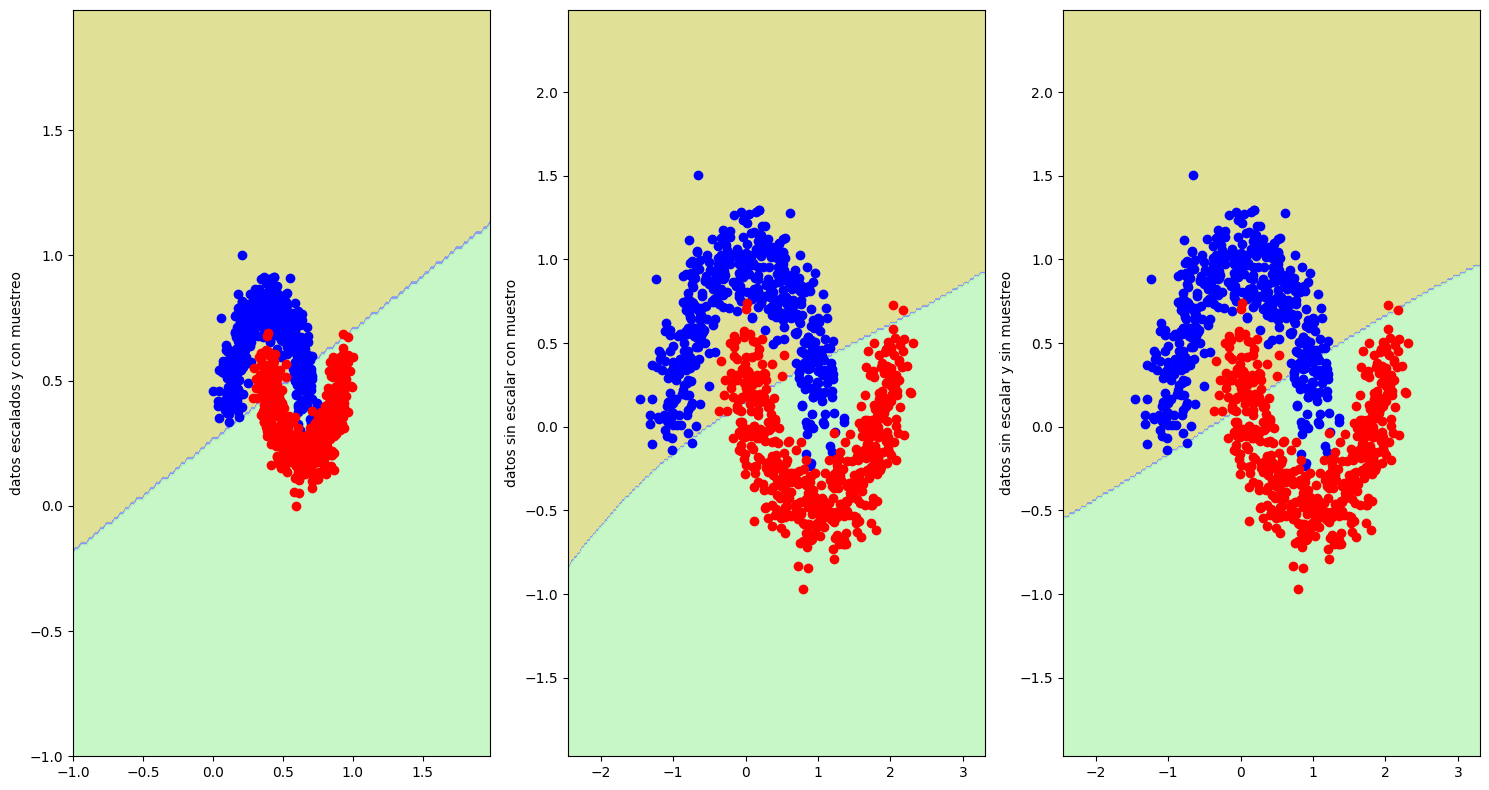

Error de entrenamiento:0.885


In [145]:
# Fronteras de clasificación.

from matplotlib.colors import ListedColormap
## Esto es para que contraste los puntos, y aquí se emplea colores RGB
c_cmap = ListedColormap(["#d9d97d","#8999f4","#b9f5b9"])

# Contorno Makes Moon

fig, ax = plt.subplots(1,3, figsize = (15,8))
X0_makes_moon, X1_makes_moon = X1_scaled[:, 0], X1_scaled[:, 1]
X0_makes_moon_no_scale, X1_makes_moon_no_scale = X1[:, 0], X1[:, 1]
xx_makes_moon, yy_makes_moon = make_meshgrid(X0_makes_moon, X1_makes_moon)
xx_makes_moon_no_scale, yy_makes_moon_no_scale = make_meshgrid(X0_makes_moon_no_scale, X1_makes_moon_no_scale)

plot_contours(ax[0], clas_makes_moon, xx_makes_moon, yy_makes_moon, cmap=c_cmap, alpha=0.8)
ax[0].plot(X1_scaled[y1==0][:,0],X1_scaled[y1==0][:,1],"bo", alpha=1)
ax[0].plot(X1_scaled[y1==1][:,0],X1_scaled[y1==1][:,1],"ro", alpha=1)
ax[0].set(ylabel = 'datos escalados y con muestreo')

plot_contours(ax[1], clas_makes_moon_no_scale, xx_makes_moon_no_scale, yy_makes_moon_no_scale, cmap=c_cmap, alpha=0.8)
ax[1].plot(X1[y1==0][:,0],X1[y1==0][:,1],"bo", alpha=1)
ax[1].plot(X1[y1==1][:,0],X1[y1==1][:,1],"ro", alpha=1)
ax[1].set(ylabel = 'datos sin escalar con muestro')

plot_contours(ax[2], clas_makes_moon_all, xx_makes_moon_no_scale, yy_makes_moon_no_scale, cmap=c_cmap, alpha=0.8)
ax[2].plot(X1[y1==0][:,0],X1[y1==0][:,1],"bo", alpha=1)
ax[2].plot(X1[y1==1][:,0],X1[y1==1][:,1],"ro", alpha=1)
ax[2].set(ylabel = 'datos sin escalar y sin muestreo')

plt.tight_layout()
plt.show()

print(f"Error de entrenamiento:{clas_makes_moon.score(X_test_scaled1, y_test1):.3f}")


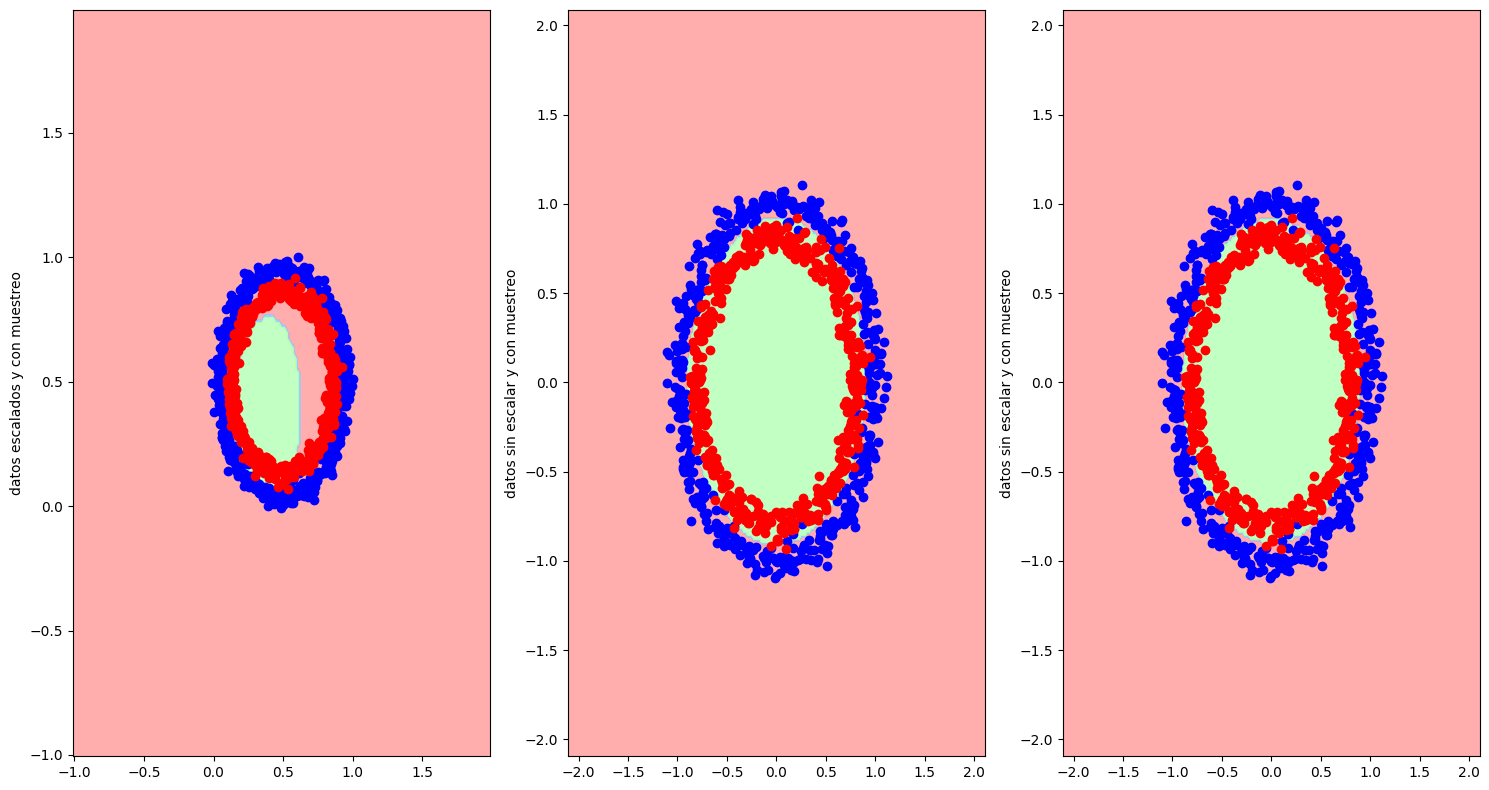

Error de entrenamiento:0.975


In [146]:

## Esto es para que contraste los puntos, y aquí se emplea colores RGB
c_cmap1 = ListedColormap(["#ff9999", "#99ccff", "#b3ffb3"])

# Contorno Makes Circle

fig, ax = plt.subplots(1,3, figsize = (15,8))
X0_makes_circle, X1_makes_circle = X2_escaled[:, 0], X2_escaled[:, 1]
X0_makes_circle_no_scale, X1_makes_circle_no_scale = X2[:, 0], X2[:, 1]
xx_makes_circle, yy_makes_circle = make_meshgrid(X0_makes_circle, X1_makes_circle)
xx_makes_circle_no_scale, yy_makes_circle_no_scale = make_meshgrid(X0_makes_circle_no_scale, X1_makes_circle_no_scale)
plot_contours(ax[0], clas_makes_circle, xx_makes_circle, yy_makes_circle, cmap=c_cmap1, alpha=0.8)
ax[0].plot(X2_escaled[y2==0][:,0],X2_escaled[y2==0][:,1],"bo", alpha=1)
ax[0].plot(X2_escaled[y2==1][:,0],X2_escaled[y2==1][:,1],"ro", alpha=1)
ax[0].set_ylabel('datos escalados y con muestreo')

plot_contours(ax[1], clas_makes_circle_no_scale, xx_makes_circle_no_scale, yy_makes_circle_no_scale, cmap=c_cmap1, alpha=0.8)
ax[1].plot(X2[y2==0][:,0],X2[y2==0][:,1],"bo", alpha=1)
ax[1].plot(X2[y2==1][:,0],X2[y2==1][:,1],"ro", alpha=1)
ax[1].set_ylabel('datos sin escalar y con muestreo')

plot_contours(ax[2], clas_makes_circle_all, xx_makes_circle_no_scale, yy_makes_circle_no_scale, cmap=c_cmap1, alpha=0.8)
ax[2].plot(X2[y2==0][:,0],X2[y2==0][:,1],"bo", alpha=1)
ax[2].plot(X2[y2==1][:,0],X2[y2==1][:,1],"ro", alpha=1)
ax[2].set_ylabel('datos sin escalar y con muestreo')

plt.tight_layout()
plt.show()

print(f"Error de entrenamiento:{clas_makes_circle.score(X_test_scaled2, y_test2):.3f}")


Error de entrenamiento:0.725


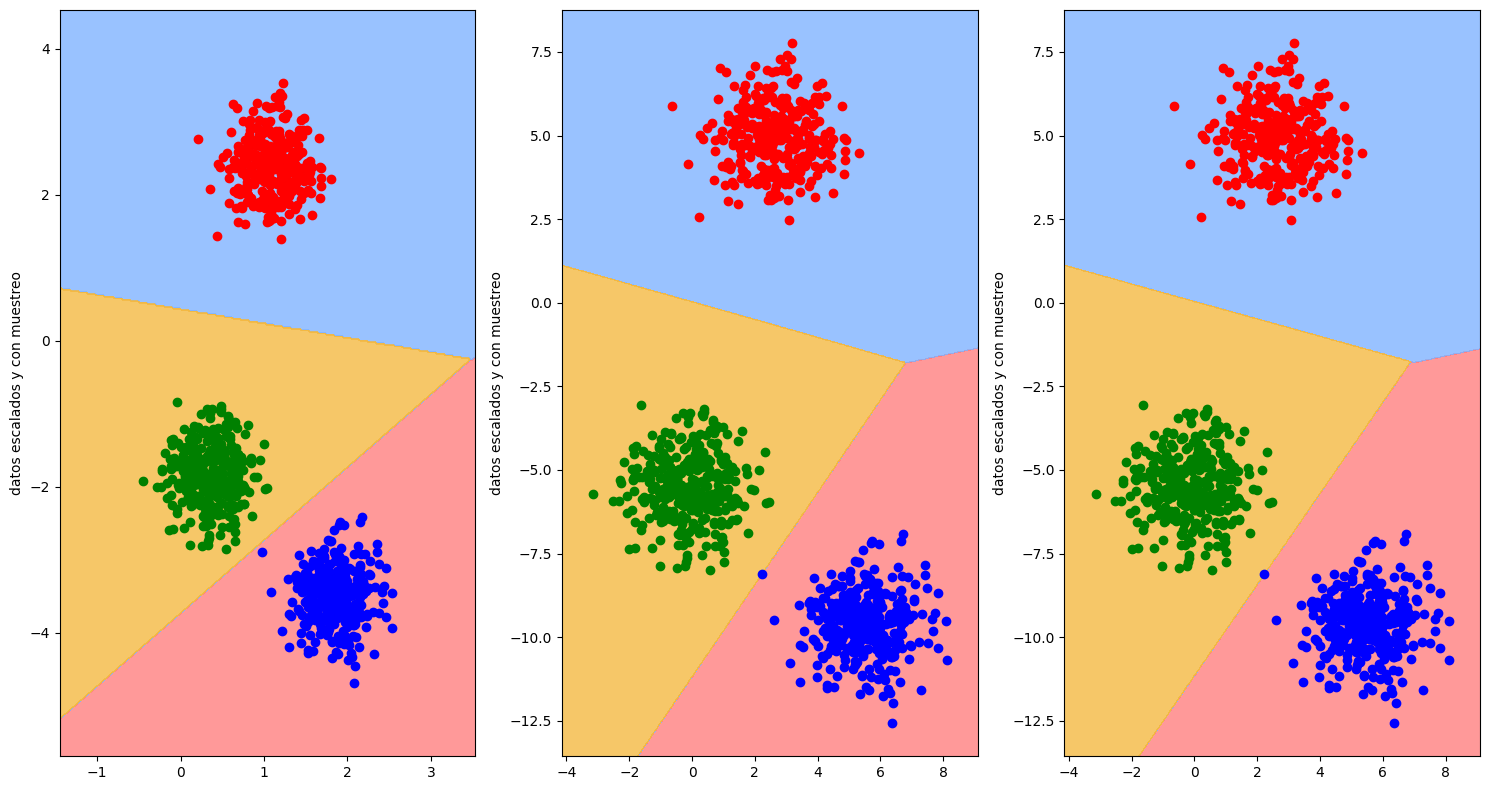

In [147]:

## Esto es para que contraste los puntos, y aquí se emplea colores RGB
c_cmap5 = ListedColormap(["#ff8080", "#80b3ff", "#f4b942"])

# Contorno Makes Circle

fig, ax = plt.subplots(1,3, figsize = (15,8))
X0_makes_blobs, X1_makes_blobs = X3_scaled[:, 0], X3_scaled[:, 1]
X0_makes_blobs_no_scale, X1_makes_blobs_no_scale = X3[:, 0], X3[:, 1]
xx_makes_blobs, yy_makes_blobs = make_meshgrid(X0_makes_blobs, X1_makes_blobs)
xx_makes_blobs_no_scale, yy_makes_blobs_no_scale = make_meshgrid(X0_makes_blobs_no_scale, X1_makes_blobs_no_scale)
plot_contours(ax[0], clas_makes_blobs, xx_makes_blobs, yy_makes_blobs, cmap=c_cmap5, alpha=0.8)
ax[0].plot(X3_scaled[y3==0][:,0],X3_scaled[y3==0][:,1],"bo", alpha=1)
ax[0].plot(X3_scaled[y3==1][:,0],X3_scaled[y3==1][:,1],"ro", alpha=1)
ax[0].plot(X3_scaled[y3==2][:,0],X3_scaled[y3==2][:,1],"go", alpha=1)
ax[0].set_ylabel('datos escalados y con muestreo')
print(f"Error de entrenamiento:{clas_makes_blobs.score(X_test3, y_test3):.3f}")

plot_contours(ax[1], clas_makes_blobs_no_scale, xx_makes_blobs_no_scale, yy_makes_blobs_no_scale, cmap=c_cmap5, alpha=0.8)
ax[1].plot(X3[y3==0][:,0],X3[y3==0][:,1],"bo", alpha=1)
ax[1].plot(X3[y3==1][:,0],X3[y3==1][:,1],"ro", alpha=1)
ax[1].plot(X3[y3==2][:,0],X3[y3==2][:,1],"go", alpha=1)
ax[1].set_ylabel('datos escalados y con muestreo')

plot_contours(ax[2], clas_makes_blobs_all, xx_makes_blobs_no_scale, yy_makes_blobs_no_scale, cmap=c_cmap5, alpha=0.8)
ax[2].plot(X3[y3==0][:,0],X3[y3==0][:,1],"bo", alpha=1)
ax[2].plot(X3[y3==1][:,0],X3[y3==1][:,1],"ro", alpha=1)
ax[2].plot(X3[y3==2][:,0],X3[y3==2][:,1],"go", alpha=1)
ax[2].set_ylabel('datos escalados y con muestreo')
plt.tight_layout()
plt.show()



              precision    recall  f1-score   support

           0       0.98      0.98      0.98        97
           1       0.98      0.98      0.98       103

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



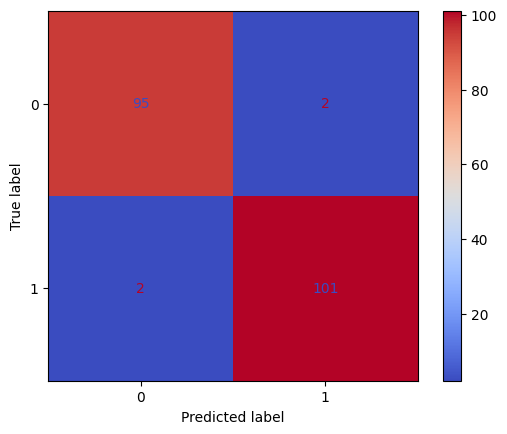

In [153]:
# Construcción de las matrices de confusión:

# Modelo
model_makes_moon = SVC(kernel='rbf', C=100,gamma = 0.01)
model.fit(X_train_scaled1,y_train1)
# Confusion matrix
y_predict = model.predict(X_test_scaled1)
print(metrics.classification_report(y_test1, y_predict))
cm = metrics.confusion_matrix(y_test1, y_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = 'coolwarm')
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        97
           1       0.96      0.99      0.98       103

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



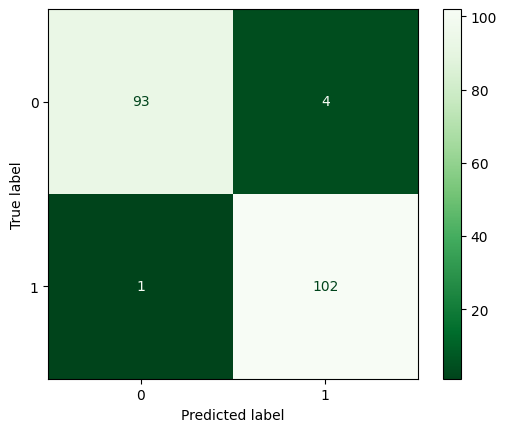

In [157]:
# Construcción de las matrices de confusión:

# Modelo
model_makes_circle = SVC(kernel='rbf', C=100)
model.fit(X_train_scaled2,y_train2)
# Confusion matrix
y_predict2 = model.predict(X_test_scaled2)
print(metrics.classification_report(y_test2, y_predict2))
cm = metrics.confusion_matrix(y_test2, y_predict2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = 'Greens_r')
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       1.00      1.00      1.00        70
           2       0.99      1.00      0.99        68

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



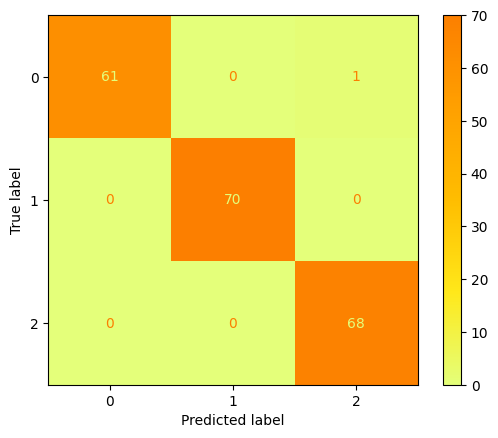

In [164]:
# Construcción de las matrices de confusión:

# Modelo
model_makes_blobs = SVC(kernel='rbf', C=100)
model.fit(X_train_scaled3,y_train3)
# Confusion matrix
y_predict3 = model.predict(X_test_scaled3)
print(metrics.classification_report(y_test3, y_predict3))
cm = metrics.confusion_matrix(y_test3, y_predict3)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = 'Wistia')
plt.grid(False)
plt.show()